# Import Packages

In [1]:
import sys
sys.path.append('..')

import matplotlib.pyplot as plt
import utils
import pandas as pd
import numpy as np
import math
import random

# Define Functions

In [2]:
def scatter(dataset: pd.DataFrame, column: str) -> None:
    """
    Scater plots a columns of a dataset against the Sales_QTY
    :param dataset: pd.DataFrame to be visualized
    :param column: Name of column (str) to be plotted against Weekly_sales
    :return: None
    """
    plt.figure(figsize=(5, 2))
    plt.scatter(dataset[column].fillna('NA'), dataset['Turnover'])
    plt.ylabel('Turnover')
    plt.xlabel(column)
    plt.xticks(rotation=45)


In [3]:
def plot_timeseries(samples: int, sales: pd.core.frame.DataFrame) -> None:
    """
    Vizualize certain timeseries.
    :param: samples: list of lists with Site ID - Article combinations to be vizualized.
            Example: [['g590', 1282277826], ['g115', 1254150002], ['g102', 1264627019]]
    :param: sales: DataFrame containing the sales data (columns SKU, Site_ID & Year_Week required)
    :return None
    """
    fig, axs = plt.subplots(math.ceil(n_series / 3), 3, figsize=(14, n_series * .6))
    axs = axs.flatten()
    ax_idx = 0

    for site, article in samples:
        df_article = sales.loc[df.SKU == article].loc[df.Site_ID == site].sort_values(by='Date').reset_index()

        df_article.plot(x='Date',
                     y='Sales_QTY',
                     title= f'SKU: {article}, Site ID: {site}',
                     legend=False,
                     ylabel = 'Sales QTY',
                     xlabel = '',
                     rot=15,
                     ax=axs[ax_idx])        
        ax_idx += 1

    plt.tight_layout()
    plt.show()


In [4]:
def plot_aggregated_timeseries(df: pd.DataFrame, kv: list, figsize: tuple = (13,3)) -> None:
    """
    Aggregates a DataFrame according to key / value pair and visualize aggregated Turnover timeseries.
    
    :param df: pandas.DataFrame to be aggregated and visualized
    :param kv: list of duples with key/value pairs used for the aggregation.
               Example: [('CENSHARE_CAT_1', 'Herren'),('CENSHARE_CAT_2', 'Jacken')]
    :param figsize: Site of the plot (tuple), default (12,3)
    :return None
    """
    d = df.copy()
    for key,value in kv:
        d = d.loc[d[key] == value]

        if d.empty:
            raise RuntimeError(f'DataFrame is empty after filtering for {key} == {value}')
            
    n_timeseries = d[['SKU','Site_ID']].drop_duplicates().shape[0]
    print(f'Found {n_timeseries} timeseries with given key / value pair to be aggregated.')

    a = pd.pivot_table(d, values='Turnover', index=['Date'], aggfunc=np.mean)
    a.reset_index(level='Date', inplace=False)
    ax = a.Turnover.plot(
        title=' & '.join([f'{k} = {v}' for k,v in kv]),
        figsize=figsize                                      
    )
    ax.set_ylabel('Turnover')

# Sales

## Import Data

In [5]:
# Import data set
columns = 'Date, SKU, Site_ID, Sales_QTY, Turnover, Article_Desc, Season_Year, Vendor_ID, Vendor_Name, Price_Level, Web_Article, CENSHARE_CAT_1, CENSHARE_CAT_2, CENSHARE_CAT_3'
query = f'SELECT {columns} FROM `globus-datahub-dev.Verteiler_PoC.timeseries_sales_weekly` where Year >= 2015 and (Year <= 2019 OR (Year = 2020 AND Week <= 47)) order by sku, site_id, year, week desc'
sales_df_raw = utils.bq_to_dataframe(query, verbose=True).pipe(utils.reduce_memory_usage)

********************
Query Duration:  0:02:41.358575
Mem. usage decreased to 676.06 Mb (16.1% reduction)


In [6]:
df = sales_df_raw.copy()
df

,Date,SKU,Site_ID,Sales_QTY,Turnover,Article_Desc,Season_Year,Vendor_ID,Vendor_Name,Price_Level,Web_Article,CENSHARE_CAT_1,CENSHARE_CAT_2,CENSHARE_CAT_3
0,2015W53,1014557,101,1.0,25.900000,DOPPELWIEGEMESSER CX/15CM DOPPEL,9999,0000126656,Schwarz Kitchen Selection SA,mittlere Preislage,X,Kuche,Kuchenmesser,wiegemesser
1,2015W52,1014557,101,3.0,77.699997,DOPPELWIEGEMESSER CX/15CM DOPPEL,9999,0000126656,Schwarz Kitchen Selection SA,mittlere Preislage,X,Kuche,Kuchenmesser,wiegemesser
2,2015W51,1014557,101,3.0,77.699997,DOPPELWIEGEMESSER CX/15CM DOPPEL,9999,0000126656,Schwarz Kitchen Selection SA,mittlere Preislage,X,Kuche,Kuchenmesser,wiegemesser
3,2015W50,1014557,101,3.0,77.699997,DOPPELWIEGEMESSER CX/15CM DOPPEL,9999,0000126656,Schwarz Kitchen Selection SA,mittlere Preislage,X,Kuche,Kuchenmesser,wiegemesser
4,2015W49,1014557,101,4.0,103.599998,DOPPELWIEGEMESSER CX/15CM DOPPEL,9999,0000126656,Schwarz Kitchen Selection SA,mittlere Preislage,X,Kuche,Kuchenmesser,wiegemesser
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7541528,2020W47,1289328500,101,4.0,56.090000,CRATE FALTKISTE BLAU GRÜN 40X30X14.5CM,9999,0000948934,HAY ApS,mittlere Preislage,X,Ordnung & Aufbewahrung,Korbe & Boxen,korbe
7541529,2020W47,1289328600,101,2.0,29.799999,CRATE FALTKISTE OFF WHITE 40X30X14.5CM,9999,0000948934,HAY ApS,mittlere Preislage,X,Ordnung & Aufbewahrung,Korbe & Boxen,korbe
7541530,2020W47,1289328700,101,5.0,32.869999,CRATE FALTKISTE EIS BLAU 26.5X17X10.5CM,9999,0000948934,HAY ApS,mittlere Preislage,X,Ordnung & Aufbewahrung,Korbe & Boxen,korbe
7541531,2020W47,1289328800,101,4.0,27.600000,CRATE FALTKISTE BLAU GRÜN 26.5X17X10.5CM,9999,0000948934,HAY ApS,mittlere Preislage,X,Ordnung & Aufbewahrung,Korbe & Boxen,korbe


## Analyse Structure and Missing Values

In [7]:
# Count the number of articles
df.SKU.drop_duplicates().count()

9182

In [8]:
# Count the number of Sites
df.Site_ID.drop_duplicates().count()

9

In [9]:
# Count number of time series
df[['Site_ID', 'SKU']].drop_duplicates().shape[0]

57073

In [10]:
# Get the data types for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7541533 entries, 0 to 7541532
Data columns (total 14 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Date            object 
 1   SKU             int32  
 2   Site_ID         int16  
 3   Sales_QTY       float32
 4   Turnover        float32
 5   Article_Desc    object 
 6   Season_Year     object 
 7   Vendor_ID       object 
 8   Vendor_Name     object 
 9   Price_Level     object 
 10  Web_Article     object 
 11  CENSHARE_CAT_1  object 
 12  CENSHARE_CAT_2  object 
 13  CENSHARE_CAT_3  object 
dtypes: float32(2), int16(1), int32(1), object(10)
memory usage: 676.1+ MB


In [11]:
# Get structure of DataFrame and numer of missing values

print("Structure of Sales Data:\n", df.shape, '\n')

pd.DataFrame({"Number of Missing Values": df.drop_duplicates().isnull().sum(),
             "In Percent": df.isnull().sum()*100/len(df)}
              ).round(2).sort_values(by='Number of Missing Values',ascending=False)


Structure of Sales Data:
 (7541533, 14) 



,Number of Missing Values,In Percent
CENSHARE_CAT_3,299863,3.98
CENSHARE_CAT_1,63636,0.84
CENSHARE_CAT_2,63636,0.84
Price_Level,12402,0.16
Date,0,0.00
SKU,0,0.00
Site_ID,0,0.00
Sales_QTY,0,0.00
Turnover,0,0.00
Article_Desc,0,0.00


## Compute Key Statistical Properties of Sales_QTY and Turnover

In [12]:
# Generate descriptive statistics using pandas.DataFrame.describe()
df[['Sales_QTY', 'Turnover']].describe().T

,count,mean,std,min,25%,50%,75%,max
Sales_QTY,7541533.0,0.380141,1.646105,-81.0,0.0,0.0,0.0,640.000000
Turnover,7541533.0,15.158031,94.377037,-16119.0,0.0,0.0,0.0,73117.148438


In [13]:
# Compute various quantiles of Sales_QTY and Turnover
pd.DataFrame({"Quantiles": np.arange(0, 1.05, 0.05),
              "Sales_QTY": df.Sales_QTY.quantile(np.arange(0, 1.05, 0.05)),
              "Turnover": df.Turnover.quantile(np.arange(0, 1.05, 0.05)),
             }).T.round(2)

# Remark: negative Sales_QTY/Turnover occur when a customer returns a product

,0.00,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,...,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1.00
Quantiles,0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,...,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1.00
Sales_QTY,-81.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,...,0.00,0.0,0.00,0.0,0.00,0.0,1.00,1.0,2.00,640.00
Turnover,-16119.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,...,0.00,0.0,0.00,0.0,0.00,0.0,11.00,35.8,79.90,73117.15


## Analyse Article Masterdata

In [14]:
# Compute the number of articles per Season_Year (normalized)
df[['SKU', 'Site_ID', 'Season_Year']].drop_duplicates().Season_Year.value_counts(normalize=True)

# Remark:  articles with Season_Year 9999 are articles not dedicated to a yearly collection 
#                and they are sold during multiple years

9999    0.973525
2020    0.015559
2021    0.007552
2018    0.002295
2019    0.001069
Name: Season_Year, dtype: float64

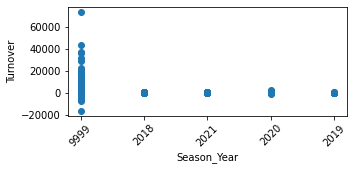

In [15]:
# Generate a scatter plot of Season_Year vs Turnover
scatter(df, 'Season_Year')

In [16]:
# Get the number of vendors / suppliers and count print the vendors with the most articles (normalized)
print('Number of vendors: ', df.Vendor_Name.drop_duplicates().count())

print('\nVendor and their normalized counts (sorted):')
df[['SKU', 'Site_ID', 'Vendor_Name']].drop_duplicates().Vendor_Name.value_counts(normalize=True).head(15)

Number of vendors:  225

Vendor and their normalized counts (sorted):


Weseta Textil AG                   0.038582
Team Trade Import & Export GmbH    0.036234
BALSIGER TEXTIL AG                 0.035604
E+H Services AG                    0.035498
Maison Truffe AG                   0.030295
Griftextil                         0.029559
SERAX NV                           0.025774
Kuhn Rikon AG                      0.024670
AB Siulas                          0.024355
Alessi SPA                         0.023671
Le Creuset Swiss AG                0.022112
Boettcher AG                       0.020045
Schwarz Kitchen Selection SA       0.019063
Herzog Kerzen AG                   0.016908
Samsonite AG                       0.015804
Name: Vendor_Name, dtype: float64

In [17]:
# Get the number of Censhare Categories and their counts (normalized)
df[['SKU', 'Site_ID', 'Price_Level']].drop_duplicates().Price_Level.value_counts(normalize=True)

mittlere Preislage    0.722322
obere Preislage       0.228045
Premium Preislage     0.036887
untere Preislage      0.012448
ohne Preislage        0.000298
Name: Price_Level, dtype: float64

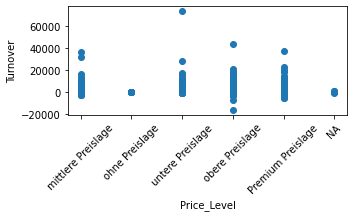

In [18]:
# Generate a scatter plot of Price_Level vs Turnover
scatter(df, 'Price_Level')

In [19]:
# Get the number of Censhare Categories and their counts (normalized)
df[['SKU', 'Site_ID', 'Web_Article']].drop_duplicates().Web_Article.value_counts(normalize=True)

X    0.957563
     0.042437
Name: Web_Article, dtype: float64

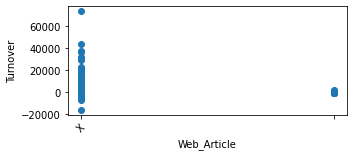

In [20]:
# Generate a scatter plot of Web_Article vs Turnover
scatter(df, 'Web_Article')

In [21]:
# Print 15 most common Censhare 1 and Censhare 2 Categories

d1 = df[['SKU','Site_ID','CENSHARE_CAT_1']].drop_duplicates().CENSHARE_CAT_1.value_counts(normalize=False).to_frame().reset_index()
d1 = d1.merge(df[['SKU','Site_ID','CENSHARE_CAT_1']].drop_duplicates().CENSHARE_CAT_1.value_counts(normalize=True).to_frame().reset_index(), on=['index'])
d1 = d1.rename(columns={'index': 'Category Name', 'CENSHARE_CAT_1_x': 'Count', 'CENSHARE_CAT_1_y': 'In Percent'})
d1 = df.CENSHARE_CAT_1.value_counts(normalize=True).head(15).to_frame().reset_index().rename(columns={'index': 'Name', 'CENSHARE_CAT_1': 'Count (normalized)'})

d2 = df[['SKU','Site_ID','CENSHARE_CAT_2']].drop_duplicates().CENSHARE_CAT_2.value_counts(normalize=False).to_frame().reset_index()
d2 = d2.merge(df[['SKU','Site_ID','CENSHARE_CAT_2']].drop_duplicates().CENSHARE_CAT_2.value_counts(normalize=True).to_frame().reset_index(), on=['index'])
d2 = d2.rename(columns={'index': 'Category Name', 'CENSHARE_CAT_2_x': 'Count', 'CENSHARE_CAT_2_y': 'In Percent'})
d2 = df.CENSHARE_CAT_2.value_counts(normalize=True).head(15).to_frame().reset_index().rename(columns={'index': 'Name', 'CENSHARE_CAT_2': 'Count (normalized)'})

pd.concat([d1, d2], axis=1, keys=('CENSHARE_CAT_1','CENSHARE_CAT_2')).round(3)

CENSHARE_CAT_1                            CENSHARE_CAT_2  \
                      Name Count (normalized)                   Name   
0                    Kuche              0.274           Kuchenhelfer   
1                    Tisch              0.204              Badtextil   
2                      Bad              0.107    Kochtopfe & Pfannen   
3                   Wohnen              0.098      Glaser & Karaffen   
4                Papeterie              0.098             Bettwasche   
5                     Bett              0.096               Geschirr   
6          Heim & Haushalt              0.040  Raumduft & Duftkerzen   
7   Ordnung & Aufbewahrung              0.031           Kuchenmesser   
8              Reisegepack              0.027    Schalen & Schusseln   
9        Elektronik Gadget              0.010                Brillen   
10                 Outdoor              0.006     Geschenkverpackung   
11       Damen Accessoires              0.004                 Backen   
12                Lingerie              0.003     Kuchenaufbewahrung   
13                  Kinder              0.002      Fondue & Raclette   
14                  Beauty              0.000          Elektrogerate   

                       
   Count (normalized)  
0               0.077  
1               0.072  
2               0.057  
3               0.048  
4               0.048  
5               0.045  
6               0.044  
7               0.037  
8               0.035  
9               0.035  
10              0.029  
11              0.027  
12              0.024  
13              0.023  
14              0.022

In [22]:
# Get the number of Censhare Categories and their counts (normalized)
# -> 3rd hierarchy level of product category
print('Number of categories: ', df.CENSHARE_CAT_3.drop_duplicates().count())

print('\nCategories and their normalized counts (sorted):')
df[['SKU', 'CENSHARE_CAT_3']].drop_duplicates().CENSHARE_CAT_3.value_counts(normalize=True)

Number of categories:  357

Categories and their normalized counts (sorted):


frottierwasche         0.060747
kissenbezug            0.049434
duvetbezug             0.033824
lesebrille             0.025792
fixleintuch            0.025113
                         ...   
spezialitatenmesser    0.000113
handwerk               0.000113
glacemaschine          0.000113
decke                  0.000113
kinderbesteck          0.000113
Name: CENSHARE_CAT_3, Length: 357, dtype: float64

# Plot Random Time-Series

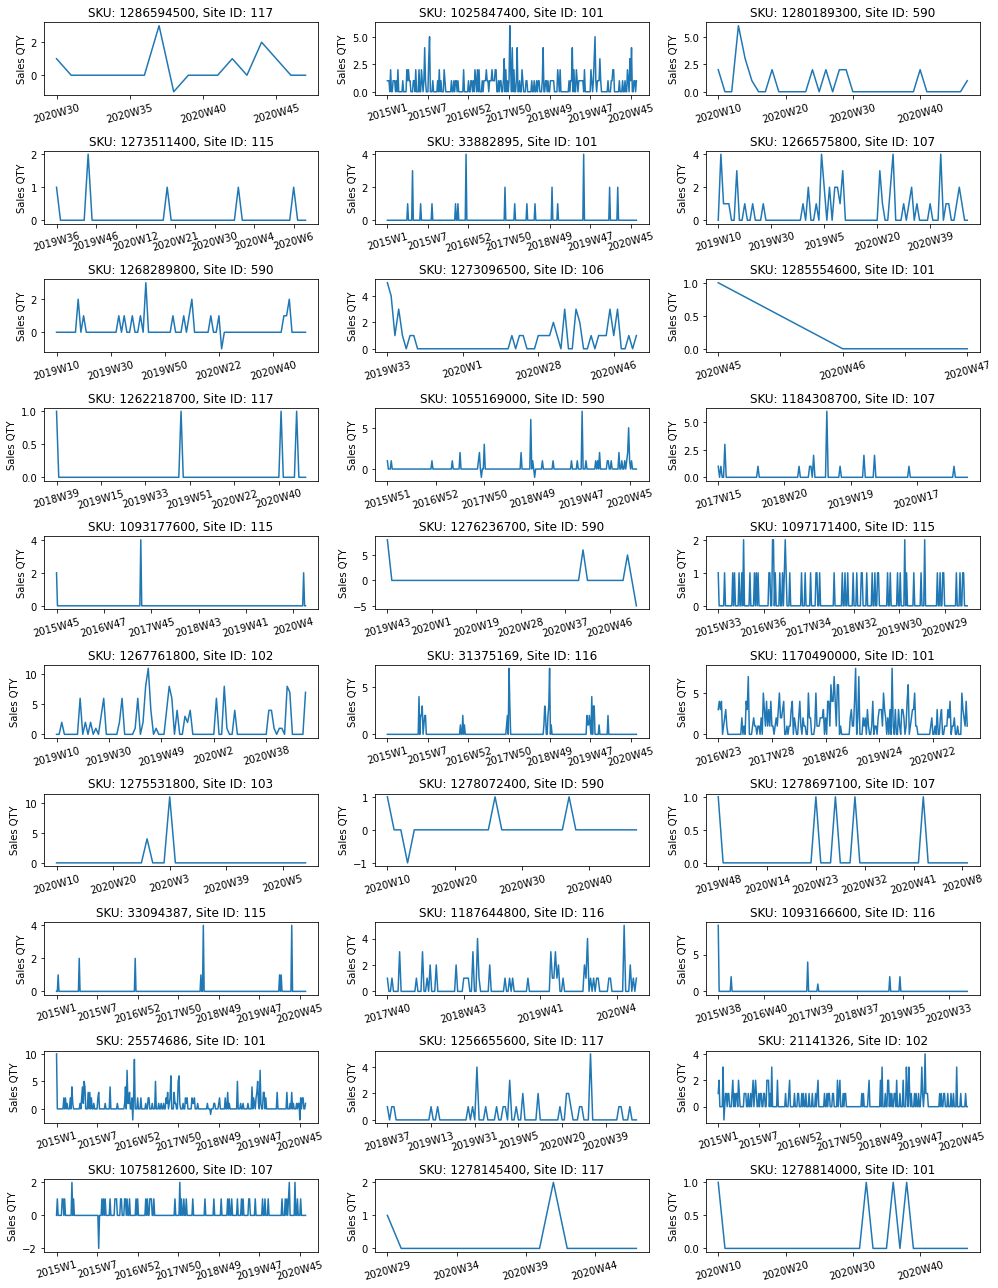

In [23]:
n_series = 30

samples = df[['Site_ID','SKU']].drop_duplicates().sample(n=n_series, random_state=8).values.tolist()

plot_timeseries(samples, df)

# Plot Time Series for Top-Sellers

In [24]:
# Get SKU / Store combinations with a mean sale greater a threshold
top_sellers_mean = df[['Site_ID', 'SKU', 'Sales_QTY']].groupby(['Site_ID', 'SKU']).mean() 
top_sellers_mean = top_sellers_mean.loc[top_sellers_mean.Sales_QTY > 0.4]
top_sellers_mean

Sales_QTY
Site_ID SKU                  
101     1014557      0.918831
        1014824      0.681818
        1016525      0.983766
        1016800      1.535714
        1017246      2.532468
...                       ...
590     1288744100   1.000000
        1288744200   1.000000
        1288764800   1.000000
        1288782700   1.000000
        1288785900   4.000000

[15098 rows x 1 columns]

In [25]:
# Get SKU / Store combinations which timeseries is longer than a threshold
top_sellers_length = df[['Site_ID', 'SKU', 'Sales_QTY']].loc[df.Sales_QTY > 0].groupby(['Site_ID', 'SKU']).count()
top_sellers_length = top_sellers_length.loc[top_sellers_length.Sales_QTY > 5]
top_sellers_length

Sales_QTY
Site_ID SKU                  
101     1014557           165
        1014824           128
        1016525           159
        1016800           214
        1017246           248
...                       ...
590     1287126400          6
        1287304400          7
        1288167800          8
        1288168100          6
        1288182300          6

[35548 rows x 1 columns]

In [26]:
# select only SKUs that meet both requirements 
top_sellers = top_sellers_mean.merge(top_sellers_length, how='inner', on=['Site_ID', 'SKU'])
top_sellers = top_sellers.reset_index(drop=False)[['Site_ID', 'SKU']]
top_sellers

,Site_ID,SKU
0,101,1014557
1,101,1014824
2,101,1016525
3,101,1016800
4,101,1017246
...,...,...
11877,590,1287126400
11878,590,1287304400
11879,590,1288167800
11880,590,1288168100


In [27]:
# Print number of articles that are top sellers (it at least one store)
len(top_sellers.SKU.drop_duplicates())

3640

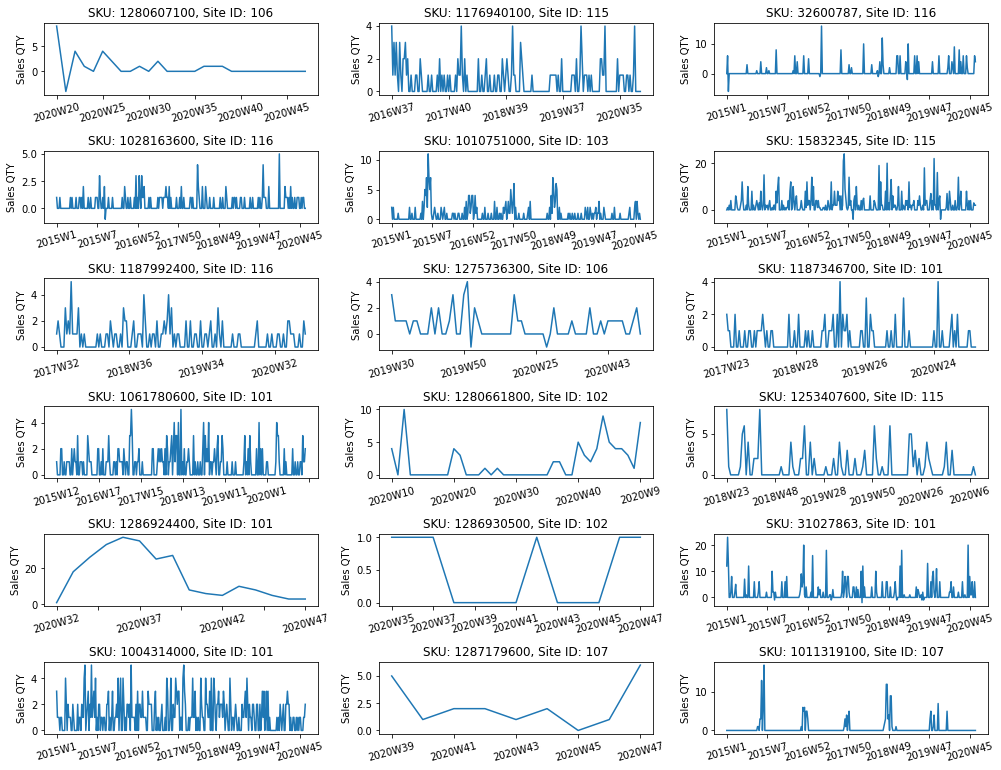

In [28]:
n_series = 18

samples = top_sellers.sample(n=n_series, random_state=1).values.tolist()

plot_timeseries(samples, df)

# Plot Time Series of Aggregated Sales

Found 57073 timeseries with given key / value pair to be aggregated.


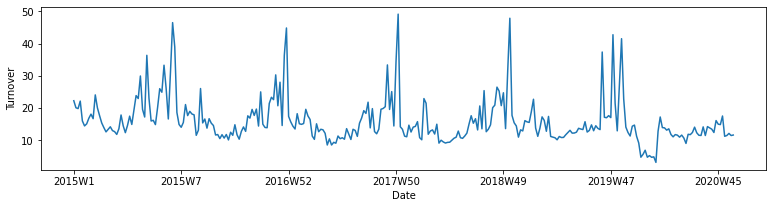

In [29]:
# Total Sale
plot_aggregated_timeseries(df, [])

Found 12556 timeseries with given key / value pair to be aggregated.


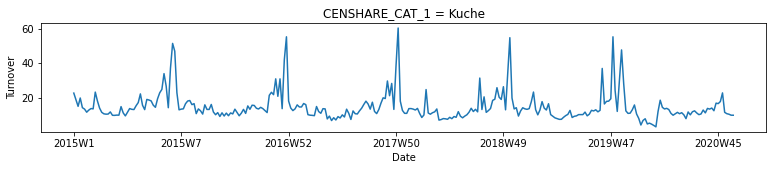

In [30]:
# Censhare Category 1
key_values =  [('CENSHARE_CAT_1', 'Kuche')]

plot_aggregated_timeseries(df, key_values, figsize=(13,2))

Found 3930 timeseries with given key / value pair to be aggregated.


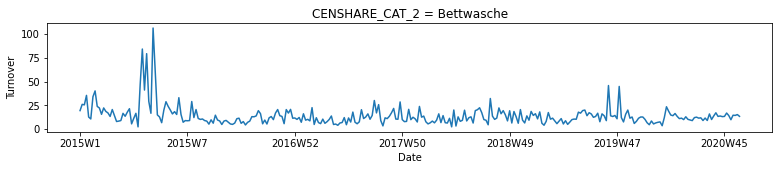

In [31]:
# Censhare Category 2
key_values =  [('CENSHARE_CAT_2', 'Bettwasche')]

plot_aggregated_timeseries(df, key_values, figsize=(13,2))

Found 1374 timeseries with given key / value pair to be aggregated.


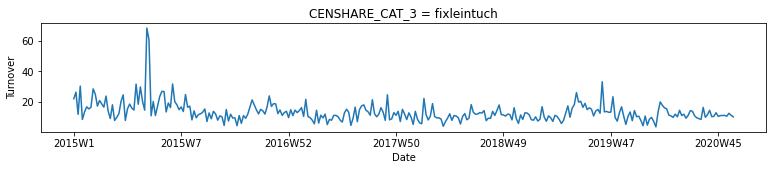

In [32]:
# Censhare Category 3
key_values =  [('CENSHARE_CAT_3', 'fixleintuch')]

plot_aggregated_timeseries(df, key_values, figsize=(13,2))